### Regularized Regression - Wage Data
Katie Corcoran

#### 0. Load the data

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

randomstate = 1000

df = pd.read_csv('wage_regularization.csv')
df.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,769000.0,12,144,1728,20736,248832,31,961,29791,923521,28629151
1,808000.0,18,324,5832,104976,1889568,37,1369,50653,1874161,69343957
2,825000.0,14,196,2744,38416,537824,33,1089,35937,1185921,39135393
3,650000.0,12,144,1728,20736,248832,32,1024,32768,1048576,33554432
4,562000.0,11,121,1331,14641,161051,34,1156,39304,1336336,45435424


#### 1. Scale the data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_sc.head()

,wage,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
0,-0.467520,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576
1,-0.371019,2.064038,2.223684,2.379630,2.530868,2.675999,1.261947,1.281608,1.297931,1.310810,1.320211
2,-0.328955,0.242112,0.157854,0.074845,-0.003836,-0.075928,-0.025824,-0.072282,-0.117721,-0.161641,-0.203607
3,-0.761969,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.347767,-0.386577,-0.422573,-0.455483,-0.485129
4,-0.979713,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,0.296119,0.251685,0.206178,0.160164,0.114187


If you split the data first, you ensure that the scaler is fitted only on the training data, which avoids data leakage. Splitting the data first leads to more generalizable models.

#### 2. Split the data

In [49]:
from sklearn.model_selection import train_test_split

target = df_sc['wage']
X = df_sc.drop(['wage'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=randomstate)
X_train.head()

,educ,educ2,educ3,educ4,educ5,age,age2,age3,age4,age5
932,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-1.635539,-1.547054,-1.463051,-1.383830,-1.309577
82,-1.124333,-1.052593,-0.979773,-0.909223,-0.842975,1.261947,1.281608,1.297931,1.310810,1.320211
370,1.608556,1.658809,1.693718,1.713830,1.719745,1.583890,1.644257,1.703790,1.762179,1.819156
452,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,0.940004,0.928630,0.913427,0.894592,0.872387
132,-0.668851,-0.681389,-0.683465,-0.677116,-0.664268,-0.669710,-0.691203,-0.708954,-0.723031,-0.733576


#### 2. Benchmark

In [50]:
# 1.
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     10.81
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           2.83e-17
Time:                        16:49:59   Log-Likelihood:                -1016.0
No. Observations:                 748   AIC:                             2054.
Df Residuals:                     737   BIC:                             2105.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.035     -0.080      0.937      -0.071       0.065
educ        -109.9917    192.003     -0.573      0.567    -486.931     266.947
educ2        462.5622    824.114      0.561      0.575   -1155.328    2080.452
educ3       -736.3809   1339.181     -0.550      0.583   -3365.445    1892.684
educ4        527.4761    974.843      0.541      0.589   -1386.323    2441.276
educ5       -143.4145    267.848     -0.535      0.593    -669.250     382.421
age        -1295.3370   4397.692     -0.295      0.768   -9928.834    7338.160
age2        5164.4620   1.79e+04      0.289      0.773   -2.99e+04    4.03e+04
age3       -7783.0117   2.73e+04     -0.285      0.776   -6.15e+04    4.59e+04
age4        5255.0538   1.87e+04      0.282      0.778   -3.14e+04    4.19e+04
age5       -1341.0610   4794.082     -0.280      0.780   -1.08e+04    8070.622
==============================================================================
Omnibus:                      202.208   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              653.255
Skew:                           1.286   Prob(JB):                    1.40e-142
Kurtosis:                       6.787   Cond. No.                     2.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. The R<sup>2</sup> of the model in the train set is 0.128.
3. None of the features are statistically significant at the 5% level.

#### 4. Perform regressions

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# 1.
model_linear = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_net = ElasticNet()

# 2.
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

# 3.
df_predictions = pd.DataFrame({'y_test': y_test,
                               'y_hat_linear': y_hat_linear,
                               'y_hat_ridge': y_hat_ridge,
                               'y_hat_lasso': y_hat_lasso,
                               'y_hat_net': y_hat_net})

# 4.
coefficients = pd.DataFrame({'Features': df.drop('wage', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,educ,-109.991745,0.169172,0.0,0.0
1,educ2,462.562174,0.309854,0.0,0.0
2,educ3,-736.380870,0.232209,0.0,0.0
3,educ4,527.476085,-0.016857,0.0,0.0
4,educ5,-143.414487,-0.393124,0.0,0.0
5,age,-1295.337040,0.005242,0.0,0.0
6,age2,5164.461994,0.136966,0.0,0.0
7,age3,-7783.011668,0.147814,0.0,0.0
8,age4,5255.053781,0.043936,0.0,0.0
9,age5,-1341.061044,-0.166490,0.0,0.0


5. The coefficients for LASSO and Elastic Net are likely 0 because the default alpha of 1.0's strength is too high and is shrinking all coefficients to 0. We need to find a more optimal alpha.

#### 5. Plot coefficients vs. alpha

Ridge:

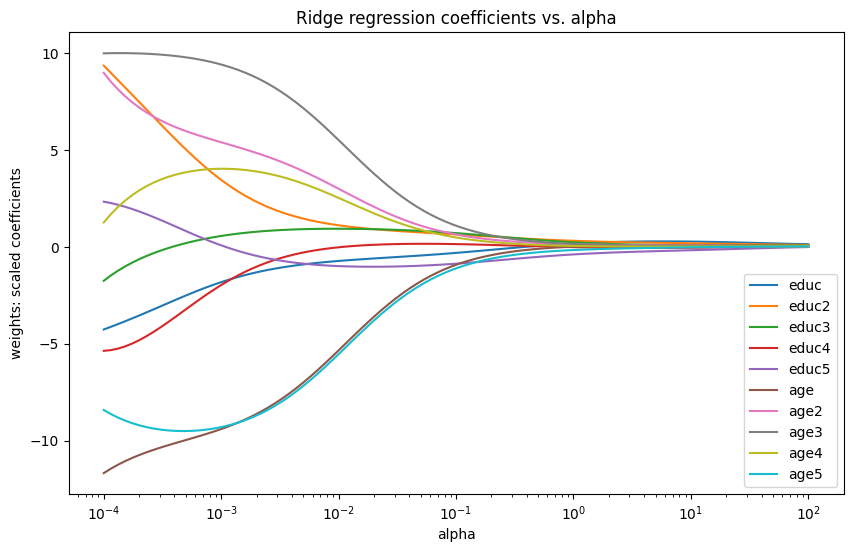

In [31]:
alphas = 10**np.linspace(-4,2,100)

ridge = Ridge()
coefs_ridge = []

for i in alphas:
    ridge.set_params(alpha=i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs_ridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients vs. alpha')
plt.legend(df.drop('wage', axis=1, inplace=False).columns)

plt.show()

The coefficients are driven close to zero around an alpha of 10. Even an alpha of 1 also seems too strong, because the coefficients are getting relatively small at that point.

LASSO:

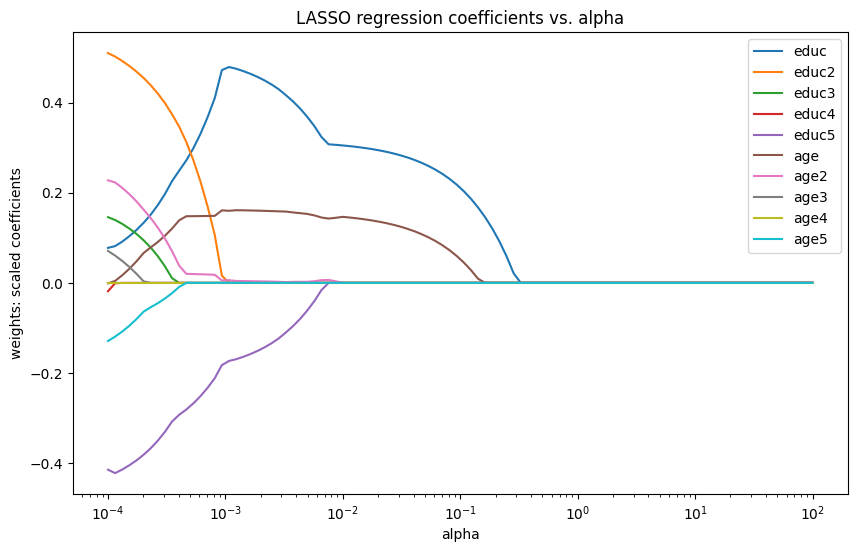

In [32]:
lasso = Lasso()
coefs_lasso = []

for i in alphas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('LASSO regression coefficients vs. alpha')
plt.legend(df.drop('wage', axis=1, inplace=False).columns)

plt.show()

Based on this plot, we know an alpha of 1.0 is too strong, because all the coefficients are zero. Educ and age are the strongest coefficients because they last the longest, with educ5 not far behind.

Elastic Net:

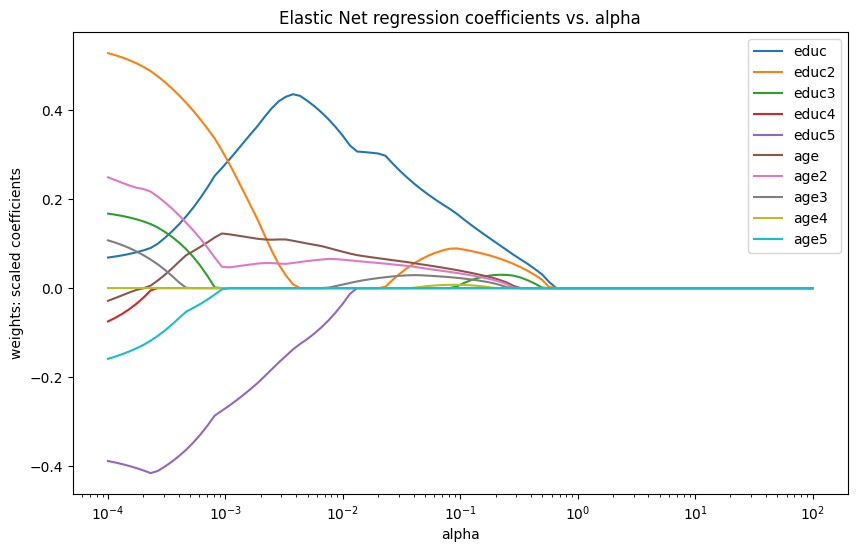

In [33]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alphas:
    elasticnet.set_params(alpha=i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)

plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients vs. alpha')
plt.legend(df.drop('wage', axis=1, inplace=False).columns)

plt.show()

In Elastic Net, all the coefficients are zero at alpha = 1.0 as well, so we need an alpha smaller than 1.0. More coefficients survive for longer than with LASSO, though, with educ, educ2, educ3, age, age2, and age3 all surviving to around alpha = 0.1.

#### 6. Coefficient plot interpretation
1. Age and age3 drop most significantly when alpha increases from 0.0001 to 10 in Ridge regression.
2. Education and age the top 2 variables that survive when alpha=0.1 in LASSO regression.


#### 7. Tune alphas using cross validation

Ridge:

In [52]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

ridgecv = RidgeCV(alphas=alphas)
ridgecv.fit(X_train, y_train)
alpha_ridge_opt = ridgecv.alpha_
alpha_ridge_opt

0.004977023564332114

LASSO:

In [53]:
lassocv = LassoCV(alphas=alphas)
lassocv.fit(X_train, y_train)
alpha_lasso_opt = lassocv.alpha_
alpha_lasso_opt

0.01

Elastic Net:

In [54]:
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=np.linspace(0.0, 1, 11))
elasticnetcv.fit(X_train, y_train)
alpha_elasticnet_opt = elasticnetcv.alpha_
alpha_elasticnet_opt

0.01519911082952933

#### 8. Refit the models

Ridge:

In [55]:
# 1.
model_linear = LinearRegression()
model_ridge = Ridge(alpha=alpha_ridge_opt)
model_lasso = Lasso(alpha=alpha_lasso_opt)
model_net = ElasticNet(alpha=alpha_elasticnet_opt)

# 2.
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

# 3.
df_predictions_optimal = pd.DataFrame({'y_test': y_test,
                               'y_hat_linear': y_hat_linear,
                               'y_hat_ridge': y_hat_ridge,
                               'y_hat_lasso': y_hat_lasso,
                               'y_hat_net': y_hat_net})

df_predictions_optimal.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
434,0.042199,-0.267170,-0.252619,-0.214151,-0.215513
238,1.910343,0.699718,0.686303,0.810961,0.816272
531,-0.700110,-0.065042,-0.037980,0.024603,0.033229
157,2.328510,0.689508,0.671949,0.763748,0.765475
601,1.341239,0.208652,0.223092,0.155429,0.157474


#### 9. Rank the models

In [56]:
MSE_test_lin = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_linear']))
RMSE_test_lin = np.sqrt(MSE_test_lin)
np.round(RMSE_test_lin,3)

0.865

In [57]:
MSE_test_ridge = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_ridge']))
RMSE_test_ridge = np.sqrt(MSE_test_ridge)
np.round(RMSE_test_ridge,3)

0.864

In [58]:
MSE_test_lasso = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_lasso']))
RMSE_test_lasso = np.sqrt(MSE_test_lasso)
np.round(RMSE_test_lasso,3)

0.868

In [46]:
MSE_test_net = np.mean(np.square(df_predictions_optimal['y_test'] - df_predictions_optimal['y_hat_net']))
RMSE_test_net = np.sqrt(MSE_test_net)
np.round(RMSE_test_net,3)

0.868

The models ranked from best to worst are Ridge, Linear, LASSO, and Elastic Net. I was able to beat the simple linear model with Ridge regression, but not with LASSO or Elastic Net. This means that Ridge regression is slightly better at predicting the values of wage, likely due to regularization.